In [32]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
data = xr.open_dataset('prog.nc',decode_times = False).mean('xh')
initial = xr.open_dataset('Initial_state.nc',decode_times = False)

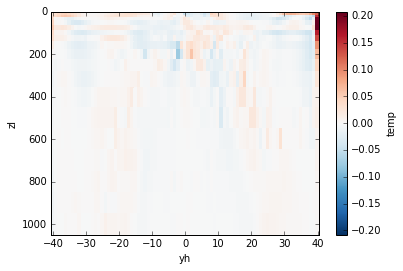

In [49]:
(data.temp[-1,:,:]-data.temp[0,:,:]).plot()
plt.gca().invert_yaxis()

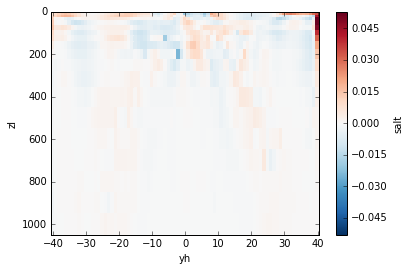

In [51]:
(data.salt[-1,:,:]-data.salt[0,:,:]).plot()
plt.gca().invert_yaxis()

/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


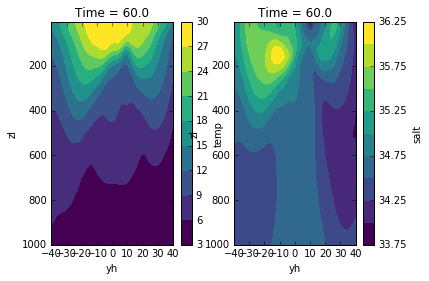

In [48]:
plt.figure()
plt.subplot(1,2,1)
data.temp[-1,:,:].plot.contourf(levels=11)
plt.gca().invert_yaxis()
plt.subplot(1,2,2)
data.salt[-1,:,:].plot.contourf(levels=11)
plt.gca().invert_yaxis()


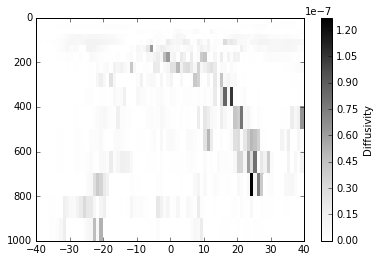

In [53]:
mixing_efficiency = 0.2
zmax = 1050

kappa = (1./(len(data.Time)*86400)*mixing_efficiency*(data.rhoinsitu[-1,:,:]-data.rhoinsitu[0,:,:])*(data.rhoinsitu.zl[::-1]))
plt.pcolormesh(kappa.yh,kappa.zl,np.abs(kappa),cmap=plt.cm.Greys)
plt.colorbar(label='Diffusivity')
plt.gca().invert_yaxis()

In [44]:
kappa = 1e7*10/(len(data.Time)*86400.)*0.2*(data.rhopot0[-1,:,:]-data.rhopot0[0,:,:])*(data.rhopot0.zl[::-1])

In [27]:
kappa

<xarray.DataArray (zl: 19, yh: 81)>
array([[  3.673445e-09,   2.724264e-09,   9.673836e-10, ...,  -1.372093e-08,
         -1.345722e-08,   1.432539e-08],
       [ -2.398667e-09,  -2.564891e-09,  -1.473665e-09, ...,   4.595446e-08,
          6.418243e-08,   3.781873e-08],
       [  1.249770e-08,   1.505331e-08,   1.546425e-08, ...,   6.855303e-08,
          3.935239e-08,   5.861084e-08],
       ..., 
       [ -1.733665e-09,  -3.625742e-10,   9.405093e-11, ...,  -2.558689e-10,
         -9.879555e-11,   8.227242e-10],
       [ -1.288172e-09,  -2.080179e-10,   3.480336e-11, ...,   3.200241e-11,
          5.738490e-11,   4.304329e-10],
       [ -4.397876e-10,  -1.119704e-10,  -6.686684e-11, ...,   6.996593e-11,
          4.356168e-11,   1.307244e-10]])
Coordinates:
  * yh       (yh) float64 -40.0 -39.0 -38.0 -37.0 -36.0 -35.0 -34.0 -33.0 ...
  * zl       (zl) float64 2.5 10.0 20.0 32.5 51.25 75.0 100.0 125.0 156.2 ...